In [1]:
import numpy
import pandas as pd

In [2]:
data = pd.read_csv('Training(2000-2017).csv')

In [3]:
training_data = data.drop(['Player', 'School', 'Pos'], axis=1)
training_data = training_data.dropna()
training_data.head()

,Ht,Wt,40yd,Vertical,Bench,Broad_Jump,3Cone,Shuttle,Draft_Pick
0,76,334,5.56,25.0,23.0,94.0,8.48,4.98,188
1,78,312,5.34,28.0,20.0,96.0,7.72,4.73,247
3,76,302,5.07,31.5,17.0,103.0,7.76,4.58,206
4,77,297,5.16,31.0,28.0,100.0,7.82,4.48,112
5,79,304,5.08,31.0,28.0,103.0,7.65,4.65,123


In [4]:
cond = training_data['Draft_Pick'] == -1
training_data.loc[cond,'Draft_Pick'] = 'Not Drafted'
cond = training_data['Draft_Pick'] != 'Not Drafted'
training_data.loc[cond,'Draft_Pick'] = 'Drafted'
training_data.head()


,Ht,Wt,40yd,Vertical,Bench,Broad_Jump,3Cone,Shuttle,Draft_Pick
0,76,334,5.56,25.0,23.0,94.0,8.48,4.98,Drafted
1,78,312,5.34,28.0,20.0,96.0,7.72,4.73,Drafted
3,76,302,5.07,31.5,17.0,103.0,7.76,4.58,Drafted
4,77,297,5.16,31.0,28.0,100.0,7.82,4.48,Drafted
5,79,304,5.08,31.0,28.0,103.0,7.65,4.65,Drafted


>0.0000 0.754 (0.047)
>0.0001 0.697 (0.003)
>0.0010 0.718 (0.031)
>0.0100 0.719 (0.026)
>0.1000 0.740 (0.038)
>1.0000 0.745 (0.047)


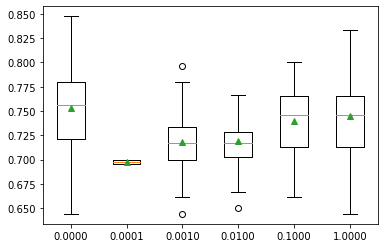

In [5]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

training_features = training_data.drop(['Draft_Pick'], axis=1)
training_target = training_data['Draft_Pick']

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

models = dict()
for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
    key = '%.4f' % p
    if p == 0.0:
        models[key] = LogisticRegression(solver='lbfgs', penalty='none', class_weight = { '0:0.33', '1:0.67'})
    else:
        models[key] = LogisticRegression(solver='lbfgs', penalty='l2', C=p, class_weight = { '0:0.33', '1:0.67' })
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, training_features, training_target)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [6]:
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
data = pd.read_csv('Testing(2018-2021).csv')
data2 = pd.read_csv('Training(2000-2017).csv')

In [7]:
testing_data = data.drop(['Player', 'School', 'Pos'], axis=1)
testing_data = testing_data.dropna()

training_data = data2.drop(['Player', 'School', 'Pos'], axis=1)
training_data = testing_data.dropna()

In [8]:
cond = testing_data['Draft_Pick'] != -1
testing_data.loc[cond,'Draft_Pick'] = 1

cond = training_data['Draft_Pick'] != -1
training_data.loc[cond,'Draft_Pick'] = 1

actuals = testing_data['Draft_Pick']
predict = testing_data.drop(['Draft_Pick'],axis=1)

training_features = training_data.drop(['Draft_Pick'], axis=1)
training_target = training_data['Draft_Pick']
training_target = training_target.astype('int')

In [57]:
lrh = LogisticRegression(solver='liblinear', penalty='l2', C=0.1, class_weight = 'balanced', max_iter = 400)

In [58]:
lrh.fit(training_features,training_target)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=400,
                   solver='liblinear')

In [59]:
predictions = lrh.predict(predict)
originals = actuals.to_numpy()

In [60]:
cnt = 0
right = 0
while cnt<predictions.size:
    if predictions[cnt] == originals[cnt]:
        right = right + 1
    cnt = cnt + 1
print(right/cnt)

0.6693548387096774
